In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import sys
sys.path.append('../.')
import datasets

In [7]:
sample_size = 600
feature_dimension = 5
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 0
y_dimension = 1
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

weight = np.random.random((X.shape[1], y_dimension))
y = X.dot(weight).reshape(sample_size)

model_range = 100
# X = np.column_stack((X, np.ones((X.shape[0], model_range-X.shape[1]))))
# X = np.column_stack((X, np.random.rand(X.shape[0], model_range-X.shape[1])))

# Sklearn already has bias term inside the nn
# X = np.column_stack((np.ones(sample_size), X))

Try to reproduce n * k = model size

Noiseless Data

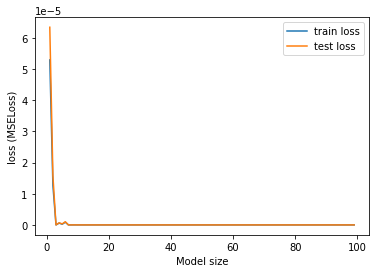

In [3]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train, y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train)-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Neuron size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [5]:
X = X + np.random.normal(0, 0.3, (sample_size, X.shape[1]))

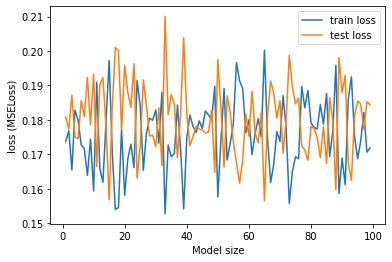

In [6]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train, y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train)-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Neuron size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()

On digit datasets

In [9]:
X, y = datasets.load_digits()
model_range = 100

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X.shape)

(1797, 64)


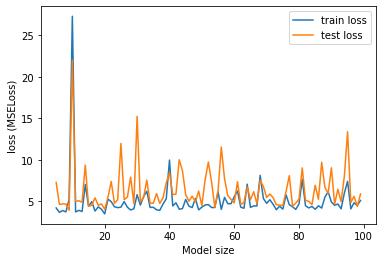

In [10]:
train_losses = []
test_losses = []

model_size = [size for size in range(5, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='adam', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train, y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train)-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])

plt.xlabel("Neuron size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()

Actually model-wise peak only have relation with feature dimension d

In [18]:
sample_size = 100
feature_dimension = 50
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 10
y_dimension = 5
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

# X = np.column_stack((np.ones(sample_size), X))

# X = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False).fit_transform(X)
# weight = np.random.random((X.shape[1], y_dimension))
# y = X.dot(weight)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

weight = np.random.random((X.shape[1], y_dimension))
y = X.dot(weight)

model_range = 100
X = np.column_stack((X, np.ones((X.shape[0], model_range-X.shape[1]))))

print(X.shape)
print(y.shape)

(100, 100)
(100, 5)


Noiseless Data

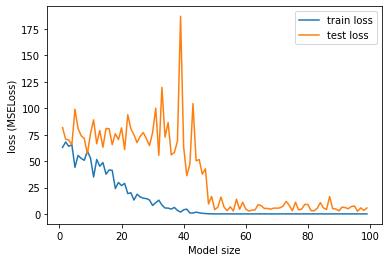

In [19]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(70,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train[:, :size], y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Feature dimension")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [20]:
X = X + np.random.normal(0, 0.3, (sample_size, X.shape[1]))

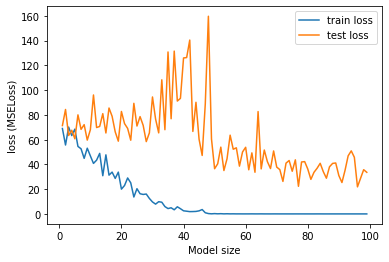

In [21]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train[:, :size], y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Model size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()